# Visualises Symmetric Nuclear Matter (SNM) data

In [1]:
import numpy as np # arrays etcetera
import matplotlib.pyplot as plt # general plotting
import matplotlib as mpl # for figure quality (dpi)
import os # Dealing with paths

In [2]:
# Figure quality
mpl.rcParams['figure.dpi']= 100 # in notebook resolution
mpl.rc("savefig", dpi=400) # higher resolution when saving

# Formatting options
fs = 15 # fontsize

In [3]:
# Path to project files (You may need to change this)
currentDir = os.getcwd()
#dataDir = os.path.join(currentDir, '../../../Data')
dataDir = currentDir+'/../../Data'

# Stored model variations
# Baseline scenario \Lambda = 900 MeV
VARIATION = dataDir+"/DLW/QMC/Bag_Mass_Param_Used/1_Standard/"

# Bag model param.  -> /Bag_Mass_Param_Used/1_Standard/
#1_Standard
#2_L1-0
#3_L1-1
#4_L1-2
#5_L1-3
#6_L1-1_gsy1-3
#7_L1-3_gsy1-3
#8_L2-0_gsy1-9
#9_Increased_f_div_g
#10_Fock_ds
#11_Eff_Pro_Mass
#12_Eff_Pro_Mass_L1-1
#13_Eff_Pro_Mass_ds
#14_Dirac_Only
#15_Hartree
#16_R0-8
#17_App_S0_32-5
#18_App_S0_30
#19_S0_30
#20_Standard_BETA_N_ONLY
#21_MyQMC700 

# Select the data you wish to visualise 
DATA_PATH = VARIATION+"SNM/"

# Name of Model for plots (ENTER THE NAME YOU WANT HERE)
MODEL = r"A model"

# Path to other peoples data 
OTHERS_DATA= dataDir+"/OTHERS/"


## Additional Data

### Various constraints on $S$ Vs $L$

In [4]:
FRDM = np.loadtxt(OTHERS_DATA+"Betty_Tsang_SVsL/"+"FRDM.dat")
print(FRDM.shape)
FRDM_list = list(FRDM) # cannot append to array, create a list
FRDM_list.append(FRDM_list[0]) # repeat the first point to create a 'closed loop'
x_FRDM, y_FRDM = zip(*FRDM_list) # create lists of x and y values

(4, 2)


In [5]:
HICBottom = np.loadtxt(OTHERS_DATA+"Betty_Tsang_SVsL/"+"HICBottom.dat")
print(HICBottom.shape)

(2, 2)


In [6]:
HICCombined = np.loadtxt(OTHERS_DATA+"Betty_Tsang_SVsL/"+"HICCombined.dat")
print(HICCombined.shape)

(2, 4)


In [7]:
HICTop = np.loadtxt(OTHERS_DATA+"Betty_Tsang_SVsL/"+"HICTop.dat")
print(HICTop.shape)

(2, 2)


In [8]:
HIC = np.concatenate([HICBottom, HICTop[::-1]])

In [9]:
HIC_list = list(HIC)
HIC_list.append(HIC_list[0])
x_HIC,y_HIC = zip(*HIC_list)

In [10]:
IAS = np.loadtxt(OTHERS_DATA+"Betty_Tsang_SVsL/"+"IAS.dat")
print(IAS.shape)

(5, 2)


In [11]:
IAS_list = list(IAS) # cannot append to array, create a list
IAS_list.append(IAS_list[0]) # repeat the first point to create a 'closed loop'
x_IAS, y_IAS = zip(*IAS_list) # create lists of x and y values

In [12]:
PDR = np.loadtxt(OTHERS_DATA+"Betty_Tsang_SVsL/"+"PDR.dat")
print(PDR.shape)

(4, 2)


In [13]:
PDR_list = list(PDR) # cannot append to array, create a list
PDR_list.append(PDR_list[0]) # repeat the first point to create a 'closed loop'
x_PDR, y_PDR = zip(*PDR_list) # create lists of x and y values

In [14]:
# This data is in spreadsheet SVsL_data_2011 should put in a *.dat file and do as above. 
Pb= [[31.9,79.1], 
[31.9,54.9],
[34.1,54.9],
[34.1,79.1]]

In [15]:
Pb_list = Pb
Pb_list.append(Pb_list[0])
x_Pb,y_Pb = zip(*Pb_list)

## SymTable Option Data Files

In [16]:
NUM = np.loadtxt(DATA_PATH+"snm_num_sym_tab.dat")
print(NUM.shape)

(11, 9)


There is also another file which is the same as this one, but calculates the symmetry energy using the difference approximation.

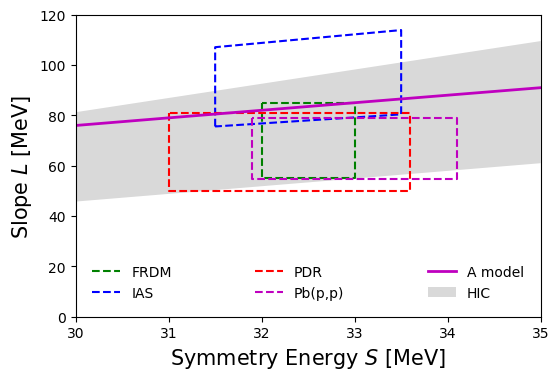

In [17]:
fig1= plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(111)

#=============
# Constraints:
#=============
# FRDM
ax1.plot(x_FRDM,y_FRDM,'g--',label='FRDM')
# HIC 
ax1.fill(x_HIC,y_HIC,'k--',label='HIC',alpha=0.15)
# IAS
ax1.plot(x_IAS,y_IAS,'b--',label='IAS')
# PDR
ax1.plot(x_PDR,y_PDR,'r--',label='PDR')
# Pb
ax1.plot(x_Pb,y_Pb,'m--',label='Pb(p,p)')

# Limits
ax1.set_xlim(30,35)
ax1.set_ylim(0,120)

# Labels
ax1.set_xlabel(r"Symmetry Energy $S$ [MeV]",fontsize=fs)
ax1.set_ylabel(r"Slope $L$ [MeV]",fontsize=fs)

# Legend
ax1.legend(frameon=False, loc="best",fontsize=fs-5)

#=======
# MODEL:
#=======
ax1.plot(NUM[:,0],NUM[:,1],'m-', linewidth=2,label=MODEL)

# Legend
plt.legend(frameon=False, loc=3,
           ncol=3, mode="expand", borderaxespad=0.8)

# Save it
fig1.savefig("symtab_test1.pdf")